In [26]:
import pandas as pd

In [ ]:
import os
os.listdir("IML_DataSets")

1. Categorical Variables

In [27]:
#df = pd.read_csv("IML_DataSets\Adult.csv")
df2 = pd.read_excel("DMforBA_DataSets\ToyotaCorolla.xls")
df2 = df2.loc[:, df2.columns != 'Id']
df2.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [28]:
df = df2[['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'Automatic', 'Gears']]
display(df.head(10))

,Price,Age_08_04,KM,Fuel_Type,Automatic,Gears
0,13500,23,46986,Diesel,0,5
1,13750,23,72937,Diesel,0,5
2,13950,24,41711,Diesel,0,5
3,14950,26,48000,Diesel,0,5
4,13750,30,38500,Diesel,0,5
5,12950,32,61000,Diesel,0,5
6,16900,27,94612,Diesel,0,5
7,18600,30,75889,Diesel,0,5
8,21500,27,19700,Petrol,0,5
9,12950,23,71138,Diesel,0,5


In [29]:
df_onehot = pd.get_dummies(df)
print("Original features:\n", list(df.columns), "\n")
print("Features after get_dummies:\n", list(df_onehot.columns))

Original features:
 ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'Automatic', 'Gears'] 

Features after get_dummies:
 ['Price', 'Age_08_04', 'KM', 'Automatic', 'Gears', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [30]:
df_dummy = pd.get_dummies(df,drop_first=True)
print("Original features:\n", list(df.columns), "\n")
print("Features after get_dummies:\n", list(df_dummy.columns))

Original features:
 ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'Automatic', 'Gears'] 

Features after get_dummies:
 ['Price', 'Age_08_04', 'KM', 'Automatic', 'Gears', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [31]:
import statsmodels.api as sm

In [32]:
X = df_dummy.loc[:, df_dummy.columns != 'Price']
y = df_dummy[['Price']]
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     952.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:06:06   Log-Likelihood:                -12651.
No. Observations:                1436   AIC:                         2.532e+04
Df Residuals:                    1429   BIC:                         2.535e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.343e+04   1209.839  

In [33]:
X2 = df_onehot.loc[:, df_onehot.columns != 'Price']
y2 = df_onehot[['Price']]
X2 = sm.add_constant(X2)
mod = sm.OLS(y2, X2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     952.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:06:58   Log-Likelihood:                -12651.
No. Observations:                1436   AIC:                         2.532e+04
Df Residuals:                    1429   BIC:                         2.535e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.031e+04    871.801  

2. Holdout and CrossValidation

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
reg2 = LinearRegression().fit(X_train, y_train)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state=123)
reg2 = LinearRegression().fit(X_train, y_train)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

Mean squared error: 2522148.99
Coefficient of determination: 0.818
Mean squared error: 2522148.99
Coefficient of determination: 0.818


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.linear_model import LinearRegression

In [45]:
cv = KFold(n_splits=20, shuffle=False)
reg = LinearRegression()

scores = cross_val_score(reg, X, y, cv=cv) 
print(scores)
mean(scores)

[-0.31194574 -0.17792972  0.74504995 -0.87216213 -1.36894904 -0.1027422
 -0.70443517 -0.06880149  0.06161105 -0.39693092  0.12384199 -0.23702546
  0.07243035 -0.53517944  0.51093639 -1.1151954  -1.18021416 -0.65355403
 -0.60829152 -0.67463462]


-0.37470606464508904

[0.81380047 0.82752965 0.79016203 0.80006827 0.83855564 0.83595427
 0.82067774 0.71896898 0.81259442 0.80845869 0.79613339 0.80643645
 0.80941801 0.83075162 0.83495322 0.7276769  0.66027115 0.79971765
 0.76032904 0.79593381]


0.7944195699054427

In [42]:
scores = cross_val_score(reg, X2, y2, cv=cv)
print(scores)
mean(scores) 

[0.6926572  0.83515241 0.79126336 0.74820294 0.83815521 0.60838583
 0.75571249 0.86172734 0.8697326  0.5963847  0.80369915 0.79799063
 0.77309563 0.82712536 0.81329898 0.78550492 0.85916735 0.80289502
 0.75822412 0.78538364]


0.7801879437136929

In [41]:
score_dummy = []
score_onehot = []
s_no = []
for i in range(0,10):
    # prepare the cross-validation procedure
    cv = KFold(n_splits=20, random_state=i, shuffle=True)
    reg = LinearRegression()
    
    # evaluate model
    scores = cross_val_score(reg, X, y, cv=cv) 
    score_dummy.append(mean(scores))

    scores = cross_val_score(reg, X2, y2, cv=cv) 
    score_onehot.append(mean(scores))
    
    s_no.append(i)
    
scores_df = pd.DataFrame(
    {'S #': s_no,
     'dummy': score_dummy,
     'onehot': score_onehot
    })
scores_df.head(10)

,S #,dummy,onehot
0,0,0.791163,0.791163
1,1,0.794188,0.794188
2,2,0.789990,0.789990
3,3,0.789978,0.789978
4,4,0.793368,0.793368
5,5,0.773248,0.773248
6,6,0.788825,0.788825
7,7,0.792591,0.792591
8,8,0.786716,0.786716
9,9,0.780188,0.780188


In [46]:
from sklearn.model_selection import LeaveOneOut


In [47]:
score_dummy = []
score_onehot = []
s_no = []
for i in range(0,10):
    # prepare the cross-validation procedure
    cv = LeaveOneOut()
    reg = LinearRegression()
    
    # evaluate model
    scores = cross_val_score(reg, X, y, cv=cv) 
    score_dummy.append(mean(scores))

    scores = cross_val_score(reg, X2, y2, cv=cv) 
    score_onehot.append(mean(scores))
    
    s_no.append(i)
    
scores_df = pd.DataFrame(
    {'S #': s_no,
     'dummy': score_dummy,
     'onehot': score_onehot
    })
scores_df.head(10)

d:\AnacondaNew\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\AnacondaNew\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\AnacondaNew\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\AnacondaNew\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\AnacondaNew\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
d:\AnacondaNew\lib\s

KeyboardInterrupt: 

3. Filter/Wrapper

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

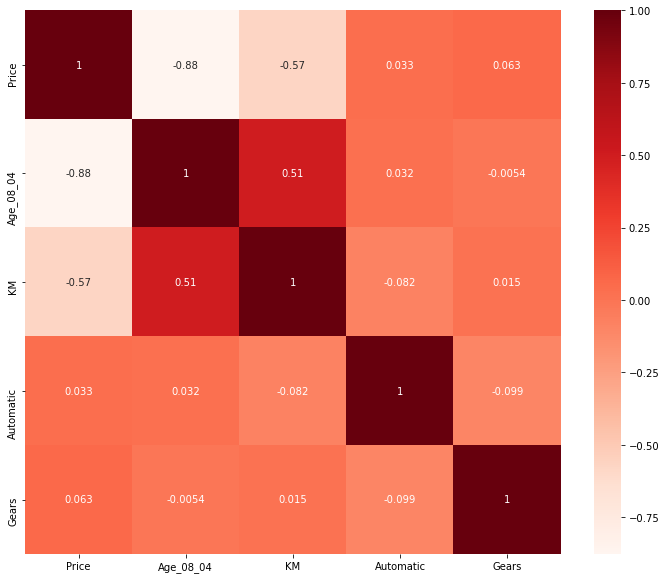

In [49]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
#cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [50]:
#Correlation with output variable
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Price        1.00000
Age_08_04    0.87659
KM           0.56996
Name: Price, dtype: float64

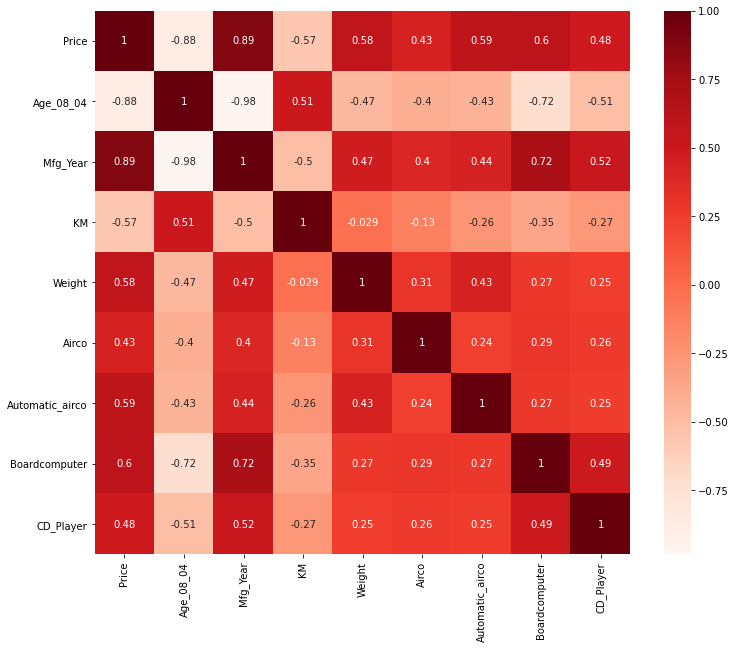

In [51]:
df3 = df2[['Price', 'Age_08_04', 'Mfg_Year','KM', 'Weight','Airco', 'Automatic_airco', 
          'Boardcomputer','CD_Player']]
plt.figure(figsize=(12,10))
#cor = df.corr()
cor = df3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

4. AIC and BIC

In [ ]:
X.dtypes

In [ ]:
mod = sm.OLS(y, X)
res = mod.fit()
print("AIC: %.2f, BIC: %.2f, R2-Adj: %.2f" % (res.aic, res.bic, res.rsquared_adj))
#"Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test)

In [ ]:
X_Red1 = X[['const', 'Age_08_04', 'KM', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
mod = sm.OLS(y, X_Red1)
res = mod.fit()
print("AIC: %.2f, BIC: %.2f, R2-Adj: %.2f" % (res.aic, res.bic, res.rsquared_adj))

In [ ]:
X_Red2 = X[['const', 'Age_08_04', 'Gears', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
mod = sm.OLS(y, X_Red2)
res = mod.fit()
print("AIC: %.2f, BIC: %.2f, R2-Adj: %.2f" % (res.aic, res.bic, res.rsquared_adj))